<a href="https://colab.research.google.com/github/Gh0st116/Neural-networks/blob/main/rede_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


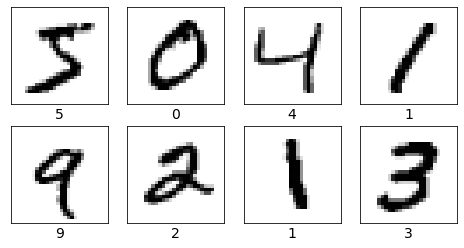

Model: "rede_IF_MultClass_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/16
1875/1875 [==============================] - 19s 10ms/step - loss: 1.0451 - accuracy: 0.8620
Epoch 2/16
1875/1875 [==============================] - 10s 

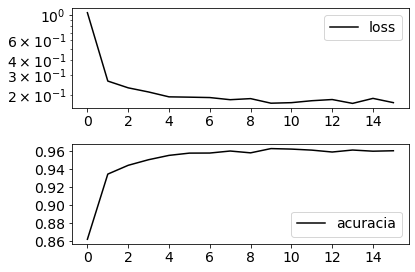

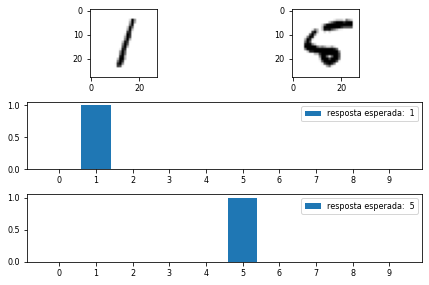

In [ ]:
#https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br
# importa as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#importa o dataset (as imagens da base "mnist")
number_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = number_mnist.load_data()

#Inspecionando o dataset
print('train shape: ', train_images.shape)
print('test shape: ', test_images.shape)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 4))
for i in range(2 * 4):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()

# criando a rede neural, já com as camadas
N_class = 10  #define o numero de classes (saida da rede)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(N_class, activation='softmax')
], name='rede_IF_MultClass_MNIST')

#compilando a rede
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# treinando a rede
history = model.fit(train_images, train_labels, epochs=16,verbose=1)

#mostra a performace do treinamento da rede
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(history.history['loss'], 'k')
plt.legend(['loss'])
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], 'k')
plt.legend(['acuracia'])
plt.tight_layout()

#testando a rede com os dados de teste
pred = model.predict(test_images)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('\n accuracia dos dados de teste: ', test_acc)

# mostra alguns resultados
q_ex = [2, 8] #quais exemplos de teste queremos olhar
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
plt.rcParams.update({'font.size': 8})
plt.figure(),
plt.subplot(3, 2, 1), plt.imshow(test_images[q_ex[0]], cmap=plt.cm.binary)
plt.subplot(3, 2, 2), plt.imshow(test_images[q_ex[1]], cmap=plt.cm.binary)
plt.subplot(3, 1, 2), plt.bar(class_names, pred[q_ex[0]])
plt.legend(['resposta esperada:  ' + class_names[test_labels[q_ex[0]]]])
plt.subplot(3, 1, 3), plt.bar(class_names,pred[q_ex[1]])
plt.legend(['resposta esperada:  ' + class_names[test_labels[q_ex[1]]]])
plt.tight_layout()

#encontra a classe de maior probabilidade
labels_pred = np.argmax(pred, axis=1)

#mostra 15 resultados esperados e os alcançados lado a lado
print('data and pred = \n', np.concatenate(
    (test_labels[None].T[0:15], labels_pred[None].T[0:15]), axis=1))

Model: "rede_IF_MultClass_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 49ms/step
imagem_entrada shape:  (1, 28, 28)
vetor_saida shape:  (1, 784)


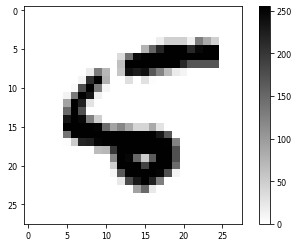

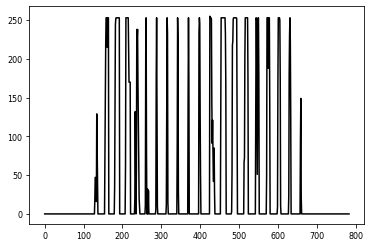

In [ ]:
#código para mostrar como a camada Flatten funciona
import tensorflow as tf
import matplotlib.pyplot as plt

#importa o dataset (as imagens da base "mnist")
number_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = number_mnist.load_data()

# criando uma rede neural, só com a camada Flatten
rede_teste_flatten = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
], name='rede_IF_MultClass_MNIST')

#compilando a rede e mostrando o sumário
rede_teste_flatten.compile()
print(rede_teste_flatten.summary())

#separa a primeira imagen, para testar a rede
imagem_entrada = test_images[8:9]

#passa a imagem pela rede
vetor_saida = rede_teste_flatten.predict(imagem_entrada)

#mostra o resultado da rede flatten
print('imagem_entrada shape: ', imagem_entrada.shape)
print('vetor_saida shape: ', vetor_saida.shape)

plt.figure()
plt.imshow(imagem_entrada[0], cmap=plt.cm.binary)
plt.colorbar()
plt.figure()
plt.plot(vetor_saida[0],'k-')